In [1]:
library(tidyverse)
library(tidymodels)
library(gridExtra)

set.seed(5)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.4     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.1.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.4     ✔ yardstick    1.1.0
✔ recipes      1.0.5     

── Conflicts ──────────────────────

In [2]:
water <- read_csv("train.csv")

Rows: 18722 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): DHSID_EA, cname, urban, path
dbl (9): year, lat, lon, n_asset, asset_index, n_water, water_index, cluster...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
water_split <- initial_split(water, prop = 0.75, strata = water_index)
water_train <- training(water_split)
water_test <- testing(water_split)

In [4]:
nrow(water_train)
nrow(water_test)
nrow(water)

[1] 14040

[1] 4682

[1] 18722

In [5]:
water_recipe <- recipe(water_index ~ asset_index, data = water_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

water_spec <- nearest_neighbor(weight_func = "rectangular", 
                              neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

water_vfold <- vfold_cv(water_train, v = 5, strata = water_index)

water_wkflw <- workflow() |>
  add_recipe(water_recipe) |>
  add_model(water_spec)

water_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [6]:
gridvals <- tibble(neighbors = seq(from = 1, to = 200, by = 3))

water_results <- water_wkflw |>
  tune_grid(resamples = water_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")

# show the results
water_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,0.8168744,5,0.002869129,Preprocessor1_Model01
4,rmse,standard,0.6463731,5,0.005162047,Preprocessor1_Model02
7,rmse,standard,0.6165568,5,0.005449053,Preprocessor1_Model03
10,rmse,standard,0.6053301,5,0.005930721,Preprocessor1_Model04
13,rmse,standard,0.6005078,5,0.006857380,Preprocessor1_Model05
16,rmse,standard,0.5962588,5,0.006925741,Preprocessor1_Model06
19,rmse,standard,0.5941909,5,0.006829597,Preprocessor1_Model07
22,rmse,standard,0.5919810,5,0.006821433,Preprocessor1_Model08
25,rmse,standard,0.5900114,5,0.006971570,Preprocessor1_Model09


In [7]:
# show only the row of minimum RMSPE
water_min <- water_results |>
  filter(mean == min(mean))

water_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
145,rmse,standard,0.5812581,5,0.007381245,Preprocessor1_Model49


In [ ]:
#smallest RMSPE occurs when K = 145. 

In [9]:
kmin <- water_min |> pull(neighbors)

water_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin) |>
  set_engine("kknn") |>
  set_mode("regression")

water_fit <- workflow() |>
  add_recipe(water_recipe) |>
  add_model(water_spec) |>
  fit(data = water_train)

water_summary <- water_fit |>
  predict(water_test) |>
  bind_cols(water_test) |>
  metrics(truth = water_index, estimate = .pred) |>
  filter(.metric == 'rmse')

water_summary 

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.5859361


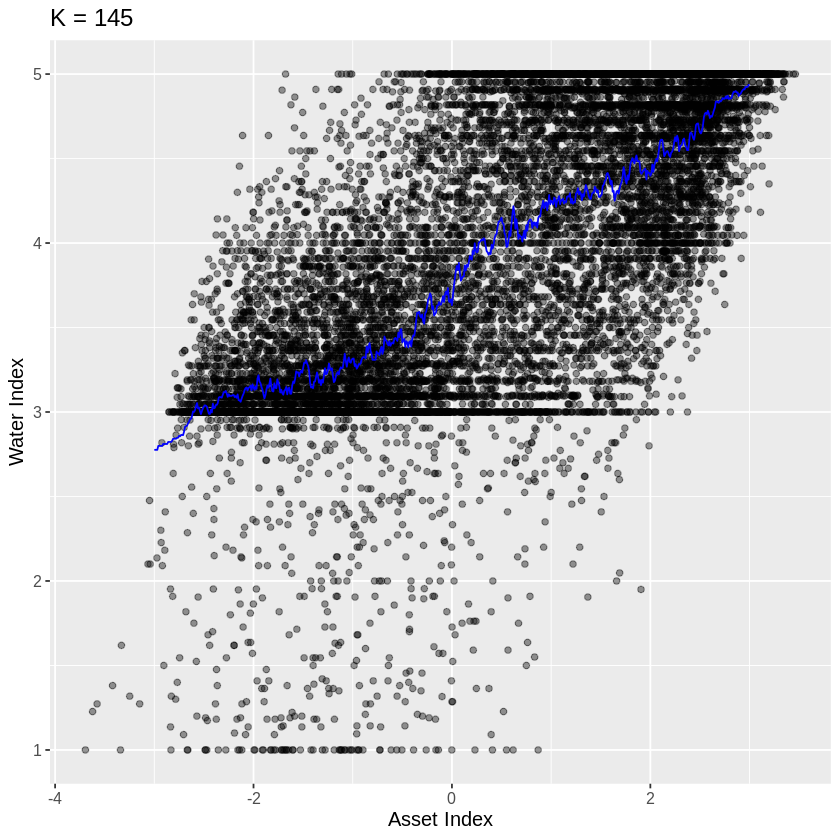

In [24]:
water_preds <- tibble(asset_index = seq(from = -3, to = 3, by = 0.01))

water_preds <- water_fit |>
  predict(water_preds) |>
  bind_cols(water_preds)

plot_final <- ggplot(water_train, aes(x = asset_index, y = water_index)) +
  geom_point(alpha = 0.4) +
  geom_line(data = water_preds, 
            mapping = aes(x = asset_index, y = .pred), 
            color = "blue") +
  xlab("Asset Index") +
  ylab("Water Index") +
  ggtitle(paste0("K = ", kmin)) + 
  theme(text = element_text(size = 12))

plot_final

In [25]:
anova(lm(water_index ~ asset_index, water_train))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
asset_index,1,5352.054,5352.0535118,15690.59,0
Residuals,14038,4788.357,0.3410996,NA,NA


In [27]:
R2 <- 1 - (4788.357/(4788.357+5352.054))
R2

[1] 0.5277946